In [3]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
coordinates = list(lat_lngs)

In [6]:
# Import citipy module
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [8]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print (url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc797a2fbf4b1b0fbfc5ab3d82b4397c


In [10]:
# Import the time library and the datetime odule from the datetime library
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginnng of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval    
----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | reshetylivka
Processing Record 3 of Set 1 | krasnoselkup
Processing Record 4 of Set 1 | nilanga
Processing Record 5 of Set 1 | appleton
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | nueve de julio
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | nokaneng
Processing Record 11 of Set 1 | grand gaube
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | breytovo
Processing Record 14 of Set 1 | mitsamiouli
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | kavaratti
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | general roca
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | svetlogorsk
Proc

In [13]:
print(len(city_data))

571


In [14]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,-3.42,89,100,18.81,GL,2023-02-27 16:40:14
1,Reshetylivka,49.5650,34.0782,32.79,98,100,10.40,UA,2023-02-27 16:40:15
2,Krasnoselkup,65.7000,82.4667,-2.54,98,58,12.15,RU,2023-02-27 16:40:16
3,Nilanga,18.1000,76.7667,80.73,21,0,5.10,IN,2023-02-27 16:40:16
4,Appleton,44.2619,-88.4154,34.11,93,100,11.50,US,2023-02-27 16:39:41
5,Jamestown,42.0970,-79.2353,38.52,50,99,11.01,US,2023-02-27 16:36:00
6,Nueve De Julio,-35.4444,-60.8831,92.34,12,0,8.41,AR,2023-02-27 16:40:18
7,Saint-Philippe,-21.3585,55.7679,80.19,81,47,8.46,RE,2023-02-27 16:40:20
8,East London,-33.0153,27.9116,74.34,94,75,6.91,ZA,2023-02-27 16:40:21
9,Nokaneng,-19.6667,22.2667,85.39,30,25,9.71,BW,2023-02-27 16:40:22


In [15]:
# Reorder the columns in the DataFrame
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2023-02-27 16:40:14,72.7868,-56.1549,-3.42,89,100,18.81
1,Reshetylivka,UA,2023-02-27 16:40:15,49.5650,34.0782,32.79,98,100,10.40
2,Krasnoselkup,RU,2023-02-27 16:40:16,65.7000,82.4667,-2.54,98,58,12.15
3,Nilanga,IN,2023-02-27 16:40:16,18.1000,76.7667,80.73,21,0,5.10
4,Appleton,US,2023-02-27 16:39:41,44.2619,-88.4154,34.11,93,100,11.50
5,Jamestown,US,2023-02-27 16:36:00,42.0970,-79.2353,38.52,50,99,11.01
6,Nueve De Julio,AR,2023-02-27 16:40:18,-35.4444,-60.8831,92.34,12,0,8.41
7,Saint-Philippe,RE,2023-02-27 16:40:20,-21.3585,55.7679,80.19,81,47,8.46
8,East London,ZA,2023-02-27 16:40:21,-33.0153,27.9116,74.34,94,75,6.91
9,Nokaneng,BW,2023-02-27 16:40:22,-19.6667,22.2667,85.39,30,25,9.71


In [16]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

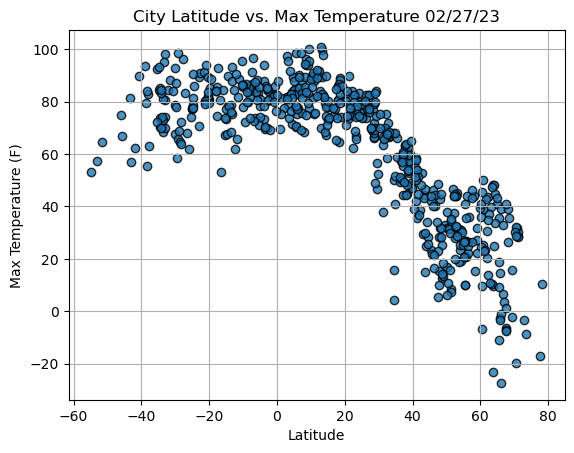

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

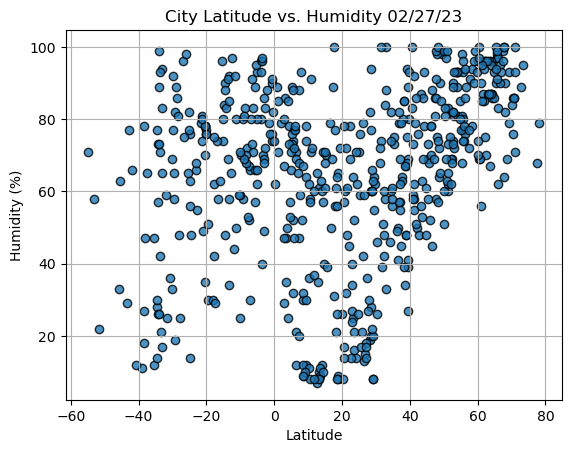

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

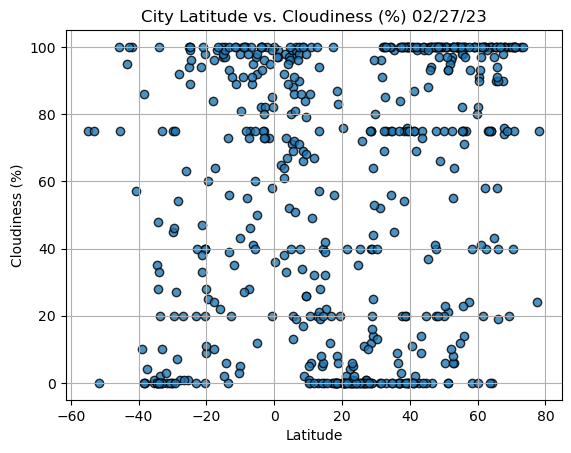

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

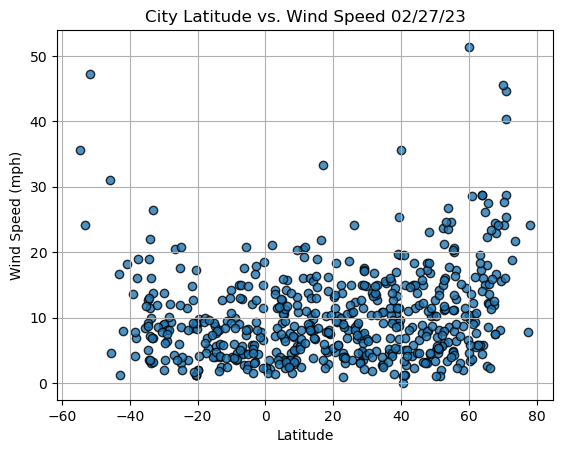

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the date
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                   Bredasdorp
Country                        ZA
Date          2023-02-27 16:40:26
Lat                      -34.5322
Lng                       20.0403
Max Temp                    70.45
Humidity                       77
Cloudiness                     35
Wind Speed                  12.75
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
566     True
567    False
568     True
569     True
570    False
Name: Lat, Length: 571, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2023-02-27 16:40:14,72.7868,-56.1549,-3.42,89,100,18.81
1,Reshetylivka,UA,2023-02-27 16:40:15,49.5650,34.0782,32.79,98,100,10.40
2,Krasnoselkup,RU,2023-02-27 16:40:16,65.7000,82.4667,-2.54,98,58,12.15
3,Nilanga,IN,2023-02-27 16:40:16,18.1000,76.7667,80.73,21,0,5.10
4,Appleton,US,2023-02-27 16:39:41,44.2619,-88.4154,34.11,93,100,11.50
...,...,...,...,...,...,...,...,...,...
564,Khanewal,PK,2023-02-27 16:59:22,30.3000,71.9333,70.02,26,13,6.42
565,Khipro,PK,2023-02-27 16:59:23,25.8285,69.3772,80.15,21,72,10.80
566,Stokmarknes,NO,2023-02-27 16:59:23,68.5646,14.9108,35.56,69,75,24.16
568,Nara,JP,2023-02-27 16:57:43,34.6851,135.8049,40.80,58,0,2.51


In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2023-02-27 16:40:14,72.7868,-56.1549,-3.42,89,100,18.81
1,Reshetylivka,UA,2023-02-27 16:40:15,49.5650,34.0782,32.79,98,100,10.40
2,Krasnoselkup,RU,2023-02-27 16:40:16,65.7000,82.4667,-2.54,98,58,12.15
3,Nilanga,IN,2023-02-27 16:40:16,18.1000,76.7667,80.73,21,0,5.10
4,Appleton,US,2023-02-27 16:39:41,44.2619,-88.4154,34.11,93,100,11.50


In [27]:
# Create Northern and Southern hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

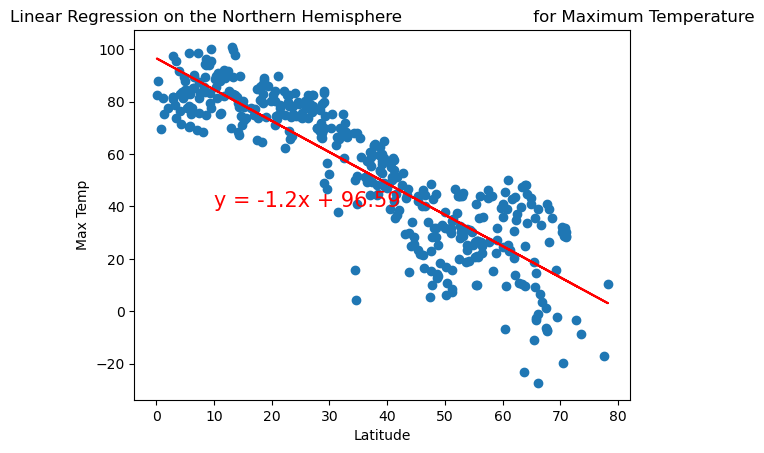

In [28]:
# Import linear regression from teh SciPy stats module
from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

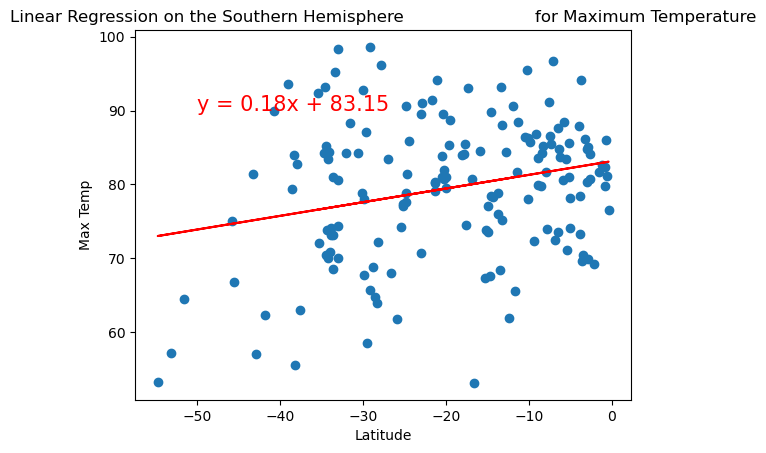

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

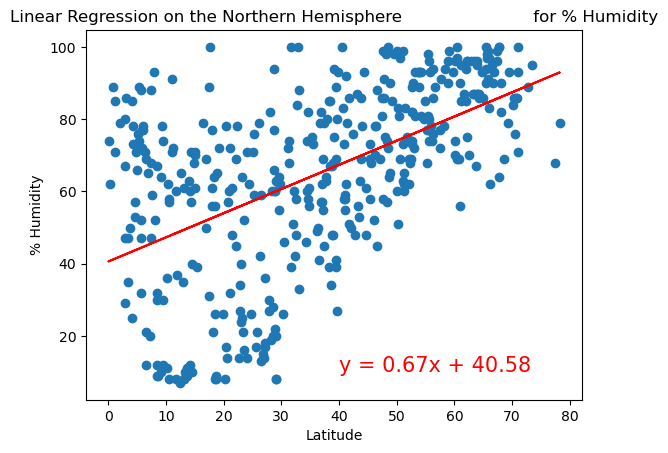

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

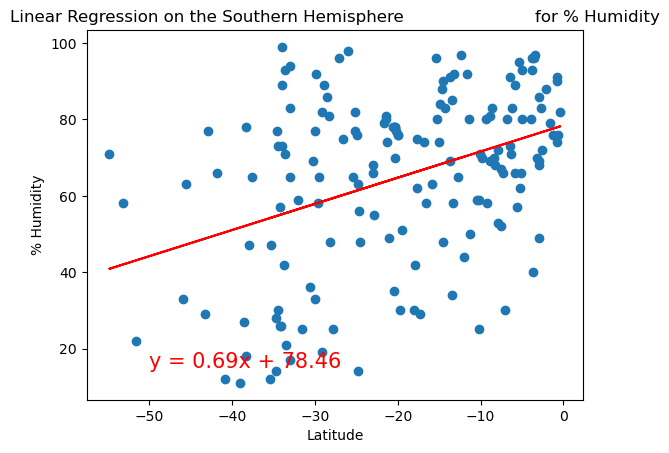

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

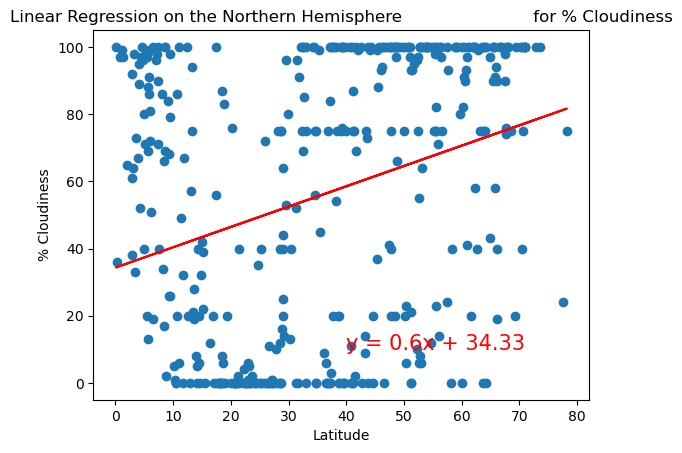

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

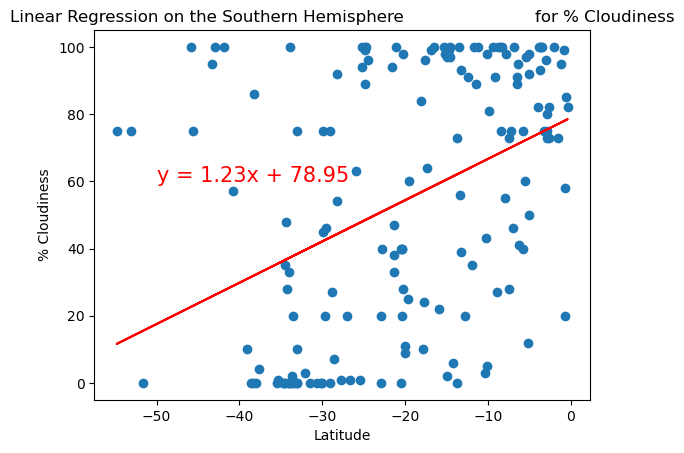

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

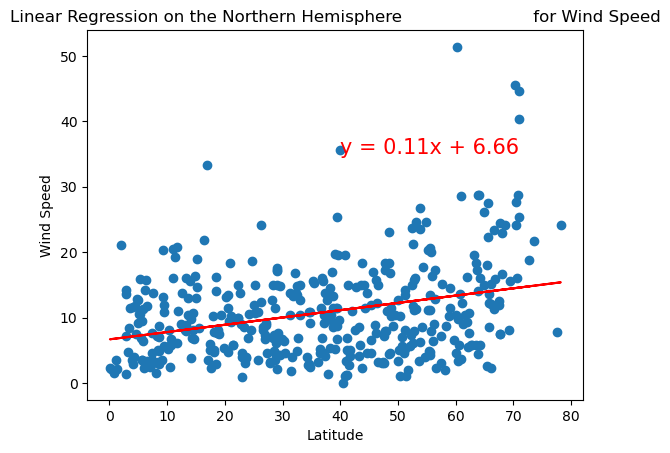

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

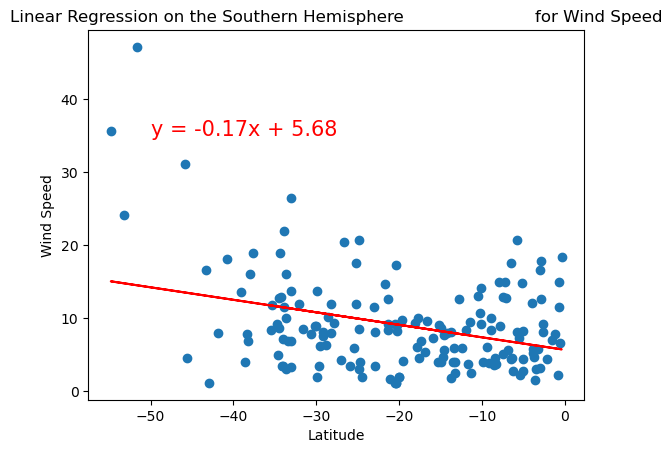

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))